In [1]:
import pandas as pd
import seaborn as sns
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
data = pd.read_csv('C:/Users/Ksenia/OneDrive/ML_HSE_BIG/OriginalRepo/HSE_BigML_AddProfEduc/module2_ML/data/telecom_churn.csv')

In [4]:
data.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [6]:
data.shape

(3333, 20)

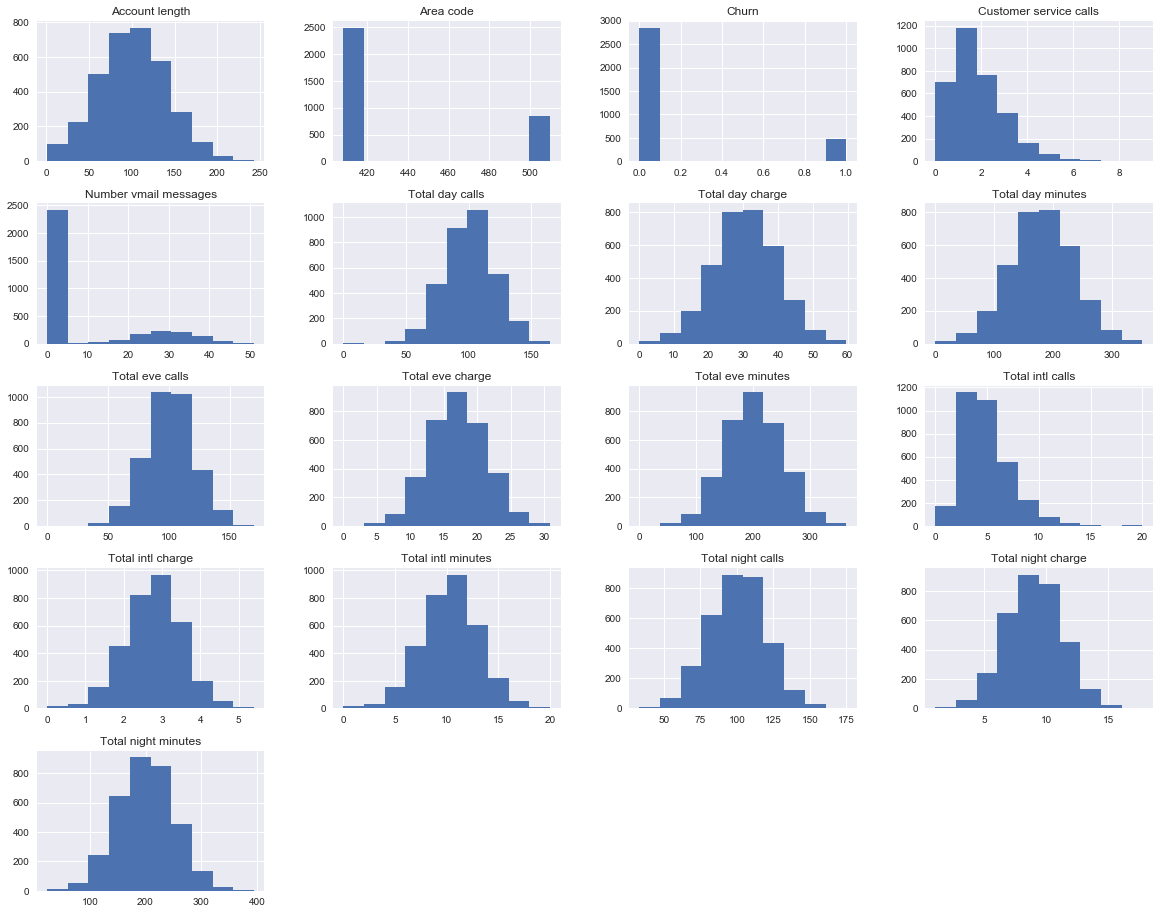

In [10]:
data.hist(figsize=(20,16));
#если 2 раза кликнуть, картинка увеличится и можно "побродить"

In [12]:
data['Churn'].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [13]:
data['Customer service calls'].value_counts()

1    1181
2     759
0     697
3     429
4     166
5      66
6      22
7       9
9       2
8       2
Name: Customer service calls, dtype: int64

In [14]:
pd.crosstab(data['Churn'], data['Customer service calls'])

Customer service calls,0,1,2,3,4,5,6,7,8,9
Churn,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0
True,92,122,87,44,76,40,14,5,1,2


In [23]:
pd.crosstab(data['Churn'], data['Customer service calls'], margins=True)

Customer service calls,0,1,2,3,4,5,6,7,8,9,All
Churn,,,,,,,,,,,
False,605,1059,672,385,90,26,8,4,1,0,2850
True,92,122,87,44,76,40,14,5,1,2,483
All,697,1181,759,429,166,66,22,9,2,2,3333


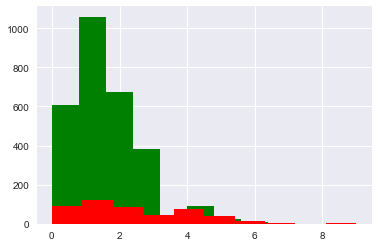

In [17]:
data[data['Churn'] == False]['Customer service calls'].hist(color = 'green');
data[data['Churn'] == True]['Customer service calls'].hist(color = 'red');

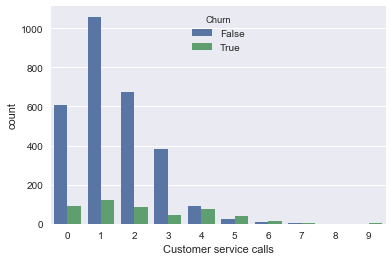

In [25]:
sns.countplot(x='Customer service calls', data = data, hue = 'Churn');

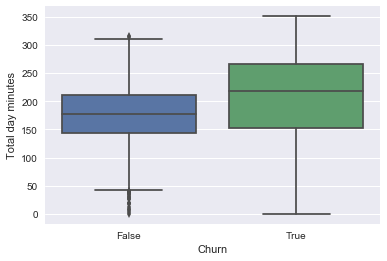

In [27]:
sns.boxplot(x='Churn', y = 'Total day minutes', data = data);
#уходят те, кто больше пользуется связью! возможно, компания задирает цены

In [28]:
pd.crosstab(data['Churn'], data['International plan'])

International plan,No,Yes
Churn,,
False,2664,186
True,346,137


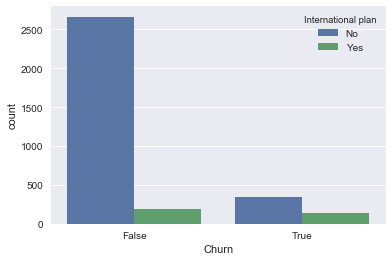

In [30]:
sns.countplot(x='Churn', hue = 'International plan', data=data);

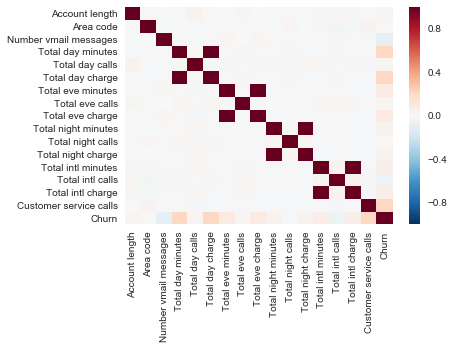

In [32]:
sns.heatmap(data.corr());